# Dota 2 - Predicting the Outcome of a Game

The following code is considering the following sections:
- Data Preparation and Feature Selection
    - Transpose of Dataset
    - Creation of New Features
    - Features Analysis
    - Variance Reduction with Ordering of Features
- Model Training Application
    - Logistic Regression
    - SVM with Gaussian Kernel
    - SVM with Cross Validation
    - SVM with Linear Kernel

# Data Preparation and Features Selection

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from __future__ import print_function
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

C:\Users\Julien\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load the dataset
data = pd.read_excel('C:\\Users\\Julien\\Documents\\MYCLOUD\\Etudes\\ESSEC-Centrale\\Courses\\Core courses\\Fondations of Machine Learning\\Project\\Dota\\dotaMatch_Final.xlsx', sep=',')
print(data.shape)
data.head()

(28993, 96)


,matchId,radiant_win,cluster,game_mode_name,duration,hero_id_1,hero_id_2,hero_id_3,hero_id_4,hero_id_5,...,xp_per_min_2,xp_per_min_3,xp_per_min_4,xp_per_min_5,xp_per_min_6,xp_per_min_7,xp_per_min_8,xp_per_min_9,xp_per_min_10,leagueid
0,4244610789,-1,138,Ranked All Pick,3141,14,60,35,97,84,...,684,672,509,682,784,591,567,827,348,0
1,4244579889,-1,137,Ranked All Pick,2211,35,20,14,22,81,...,426,457,381,781,1000,536,688,753,826,0
2,4235878221,1,135,Ranked All Pick,2408,25,31,11,86,41,...,441,811,522,654,581,374,599,523,541,0
3,4235835817,1,137,Ranked All Pick,2786,11,63,78,14,103,...,818,736,661,608,462,849,720,721,735,0
4,4235786355,1,131,Ranked All Pick,3235,11,104,50,19,89,...,606,446,670,789,547,571,696,633,786,0


In [3]:
# check duplicates
data['matchId'].value_counts()

4224120626    7
4232959056    7
4248860482    7
4236815351    7
4256199452    7
4251275642    6
4239449653    6
4252746058    6
4248752935    6
4221181402    6
4255451613    6
4239263350    6
4229658442    6
4254354868    6
4246889553    6
4220568403    5
4236732270    5
4240976031    5
4244831879    5
4252554718    5
4242464848    5
4242367535    5
4248123979    5
4243905812    5
4230725338    5
4245480319    5
4251336881    5
4243884222    5
4253158590    5
4228892567    5
             ..
4243035834    1
4098236091    1
4248676028    1
4256083645    1
4254611134    1
4066880498    1
4210049494    1
4118895061    1
4251606723    1
4222772932    1
4245219837    1
3892875304    1
4232101551    1
4246237936    1
4234499746    1
4241686167    1
4211512986    1
4228591261    1
4251485496    1
4113974944    1
3997176284    1
4110311075    1
4212698797    1
4196361892    1
4231655077    1
4168840870    1
4241854121    1
4234188458    1
4247693787    1
4166533120    1
Name: matchId, Length: 2

In [4]:
# Select only games that last more than 10 min
data = data.drop_duplicates(keep = 'first')
data = data[data.duration >= 600]
data.head()

,matchId,radiant_win,cluster,game_mode_name,duration,hero_id_1,hero_id_2,hero_id_3,hero_id_4,hero_id_5,...,xp_per_min_2,xp_per_min_3,xp_per_min_4,xp_per_min_5,xp_per_min_6,xp_per_min_7,xp_per_min_8,xp_per_min_9,xp_per_min_10,leagueid
0,4244610789,-1,138,Ranked All Pick,3141,14,60,35,97,84,...,684,672,509,682,784,591,567,827,348,0
1,4244579889,-1,137,Ranked All Pick,2211,35,20,14,22,81,...,426,457,381,781,1000,536,688,753,826,0
2,4235878221,1,135,Ranked All Pick,2408,25,31,11,86,41,...,441,811,522,654,581,374,599,523,541,0
3,4235835817,1,137,Ranked All Pick,2786,11,63,78,14,103,...,818,736,661,608,462,849,720,721,735,0
4,4235786355,1,131,Ranked All Pick,3235,11,104,50,19,89,...,606,446,670,789,547,571,696,633,786,0


In [5]:
# Check missing values
data.isnull().sum()

matchId            0
radiant_win        0
cluster            0
game_mode_name     0
duration           0
hero_id_1          0
hero_id_2          0
hero_id_3          0
hero_id_4          0
hero_id_5          0
hero_id_6          0
hero_id_7          0
hero_id_8          0
hero_id_9          0
hero_id_10         0
account_id_1       0
account_id_2       0
account_id_3       0
account_id_4       0
account_id_5       0
account_id_6       0
account_id_7       0
account_id_8       0
account_id_9       0
account_id_10      0
player_slot_1      0
player_slot_2      0
player_slot_3      0
player_slot_4      0
player_slot_5      0
                  ..
gold_per_min_2     0
gold_per_min_3     0
gold_per_min_4     0
gold_per_min_5     0
gold_per_min_6     0
gold_per_min_7     0
gold_per_min_8     0
gold_per_min_9     0
gold_per_min_10    0
last_hits_1        0
last_hits_2        0
last_hits_3        0
last_hits_4        0
last_hits_5        0
last_hits_6        0
last_hits_7        0
last_hits_8  

In [6]:
# Split the data set
data.sort_values(by=['matchId'])
train = data[:int(data.shape[0]*0.90)]
test = data[int(data.shape[0]*0.90):]

In [7]:
# Transform train data to have information about players in the same columns 
train2 = pd.DataFrame(columns=['matchId', 'radiant_win', 'duration', 'hero_id', 'account_id', 'player_slot', 
                              'kills', 'deaths', 'assists', 'gold_per_min', 'last_hits','xp_per_min'])
for i in range(1,11):
    d = train.iloc[1:,[0, 1, 4, i+4, i+14, i+24, i+34, i+44, i+54, i+64, i+74, i+84]]
    d.columns = ['matchId', 'radiant_win', 'duration', 'hero_id', 'account_id', 'player_slot', 
                              'kills', 'deaths', 'assists', 'gold_per_min', 'last_hits','xp_per_min']
    train2 = pd.concat([train2, d], axis=0, keys=None)
print(train2.shape)
train2['team'] = '1' #Radiant
train2 = train2.reset_index()
for i in range(int(train2.shape[0]/2-1),train2.shape[0]):
    train2.at[i, 'team'] = '0' # Dire
train2 = train2.drop('index', axis = 1)
train2 = train2.drop_duplicates(keep = 'first')
train2.head()

(220980, 12)


,matchId,radiant_win,duration,hero_id,account_id,player_slot,kills,deaths,assists,gold_per_min,last_hits,xp_per_min,team
0,4244579889,-1,2211,35,91751637,0,3,10,11,393,155,417,1
1,4235878221,1,2408,25,171758899,0,16,9,13,575,198,649,1
2,4235835817,1,2786,11,89117038,0,14,11,14,601,310,716,1
3,4235786355,1,3235,11,4294967295,0,14,9,12,681,471,727,1
4,4235738179,1,2698,62,85536171,0,5,8,21,411,43,500,1


# Transpose our Dataset

In [8]:
# The same for test
test2 = pd.DataFrame(columns=['matchId', 'radiant_win', 'duration', 'hero_id', 'account_id', 'player_slot', 
                              'kills', 'deaths', 'assists', 'gold_per_min', 'last_hits','xp_per_min'])
for i in range(1,11):
    d = test.iloc[1:,[0, 1, 4, i+4, i+14, i+24, i+34, i+44, i+54, i+64, i+74, i+84]]
    d.columns = ['matchId', 'radiant_win', 'duration', 'hero_id', 'account_id', 'player_slot', 
                              'kills', 'deaths', 'assists', 'gold_per_min', 'last_hits','xp_per_min']
    test2 = pd.concat([test2, d], axis=0, keys=None)
print(test2.shape)
test2['team'] = '1' # Radiant
test2 = test2.reset_index()
for i in range(int(test2.shape[0]/2-1),test2.shape[0]):
    test2.at[i, 'team'] = '0' # Dire
test2 = test2.drop('index', axis = 1)
test2 = test2.drop_duplicates(keep = 'first')
test2.head()

(24550, 12)


,matchId,radiant_win,duration,hero_id,account_id,player_slot,kills,deaths,assists,gold_per_min,last_hits,xp_per_min,team
0,4175786086,1,2408,70,4294967295,0,17,5,17,530,165,707,1
1,4175721477,-1,2706,10,4294967295,0,17,8,6,632,275,744,1
2,4175668662,1,2278,21,4294967295,0,13,4,10,467,139,561,1
3,4174486906,-1,1887,36,857908232,0,6,7,2,392,124,410,1
4,4174438727,-1,1421,102,4294967295,0,0,9,3,177,33,195,1


In [9]:
# check how many players of train data we have in test
trainlist = list(train2['account_id'].unique())
len(trainlist)
testlist = list(test2['account_id'])
len(testlist)
compare = list(set(testlist) - set(trainlist))
len(compare)
count = 0
for i in range(len(testlist)):
    if testlist[i] in compare:
        count = count+1
print(count/len(testlist))  

0.26521384928716907


# Creation of New Features

In [10]:
# Convert data to numeric
train2['matchId'] = pd.to_numeric(train2['matchId'])
train2['radiant_win'] = pd.to_numeric(train2['radiant_win'])
train2['duration'] = pd.to_numeric(train2['duration'])
train2['hero_id'] = pd.to_numeric(train2['hero_id'])
train2['account_id'] = pd.to_numeric(train2['account_id'])
train2['player_slot'] = pd.to_numeric(train2['player_slot'])
train2['kills'] = pd.to_numeric(train2['kills'])
train2['deaths'] = pd.to_numeric(train2['deaths'])
train2['assists'] = pd.to_numeric(train2['assists'])
train2['gold_per_min'] = pd.to_numeric(train2['gold_per_min'])
train2['last_hits'] = pd.to_numeric(train2['last_hits'])
train2['xp_per_min'] = pd.to_numeric(train2['xp_per_min'])
train2['team'] = pd.to_numeric(train2['team'])
train2.dtypes

matchId         int64
radiant_win     int64
duration        int64
hero_id         int64
account_id      int64
player_slot     int64
kills           int64
deaths          int64
assists         int64
gold_per_min    int64
last_hits       int64
xp_per_min      int64
team            int64
dtype: object

In [11]:
# Calculate new variables with values per minute
train2['kills_per_min'] = (train2['kills'] / train2['duration'] * 60)
train2['deaths_per_min'] = (train2['deaths'] / train2['duration'] * 60)
train2['assists_per_min'] = (train2['assists'] / train2['duration'] * 60)
train2['last_hits_per_min'] = (train2['last_hits'] / train2['duration'] * 60)
train2.head()

,matchId,radiant_win,duration,hero_id,account_id,player_slot,kills,deaths,assists,gold_per_min,last_hits,xp_per_min,team,kills_per_min,deaths_per_min,assists_per_min,last_hits_per_min
0,4244579889,-1,2211,35,91751637,0,3,10,11,393,155,417,1,0.081411,0.271370,0.298507,4.206242
1,4235878221,1,2408,25,171758899,0,16,9,13,575,198,649,1,0.398671,0.224252,0.323920,4.933555
2,4235835817,1,2786,11,89117038,0,14,11,14,601,310,716,1,0.301508,0.236899,0.301508,6.676238
3,4235786355,1,3235,11,4294967295,0,14,9,12,681,471,727,1,0.259660,0.166924,0.222566,8.735703
4,4235738179,1,2698,62,85536171,0,5,8,21,411,43,500,1,0.111193,0.177910,0.467013,0.956264


# Features Analysis

We will now see the behavior that our features have in the dataset and the creation of new ones based on them. We will also analyze these features to see if our final dataset is ready to train our model.

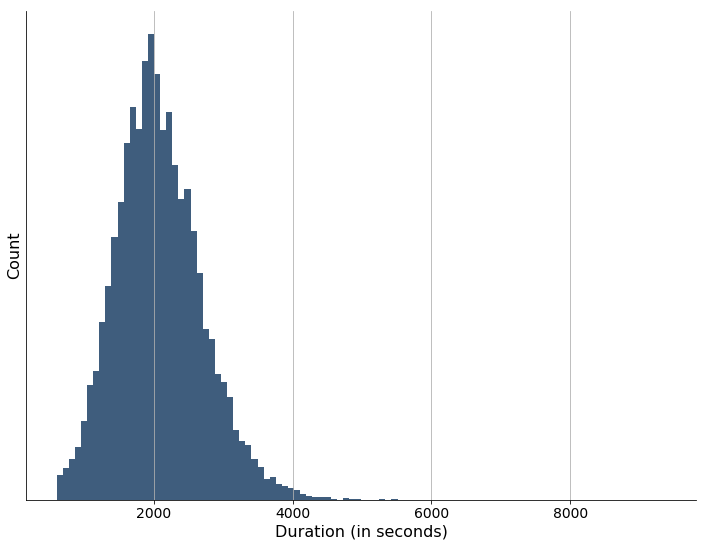

In [12]:
#Histogram plot - duration of games
plt.figure(figsize=(12, 9)) 
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(range(2000, 15000, 2000), fontsize=14) 
plt.xlabel("Duration (in seconds)", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
data['duration'].hist(color="#3F5D7D", bins=100)
plt.savefig("Dota2_games_duration", bbox_inches="tight")

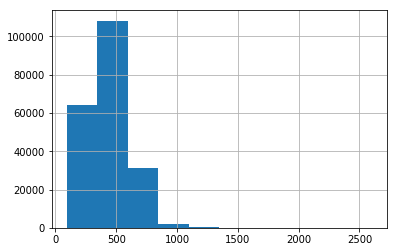

In [15]:
train2['gold_per_min'].hist()


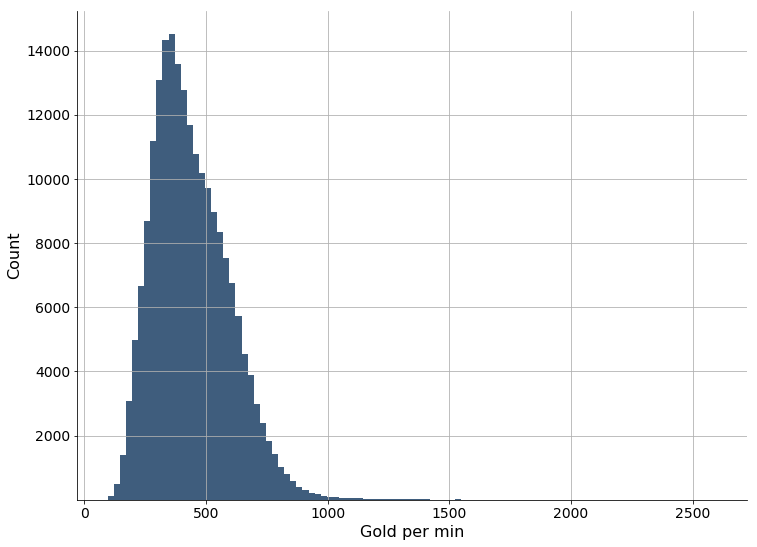

In [13]:
plt.figure(figsize=(12, 9)) 
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(range(2000, 15000, 2000), fontsize=14) 
plt.xlabel("Gold per min", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
train2['gold_per_min'].hist(color="#3F5D7D", bins=100)
#plt.savefig("Gold per min", bbox_inches="tight")

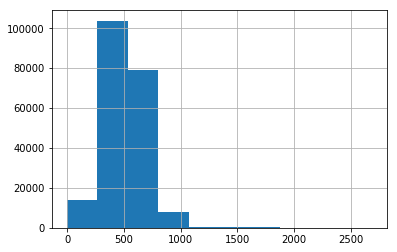

In [16]:
train2['xp_per_min'].hist()

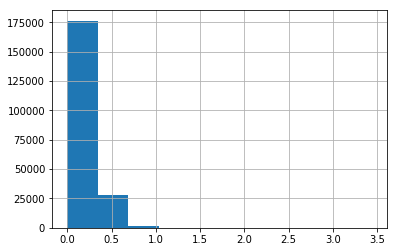

In [17]:
train2['kills_per_min'].hist()

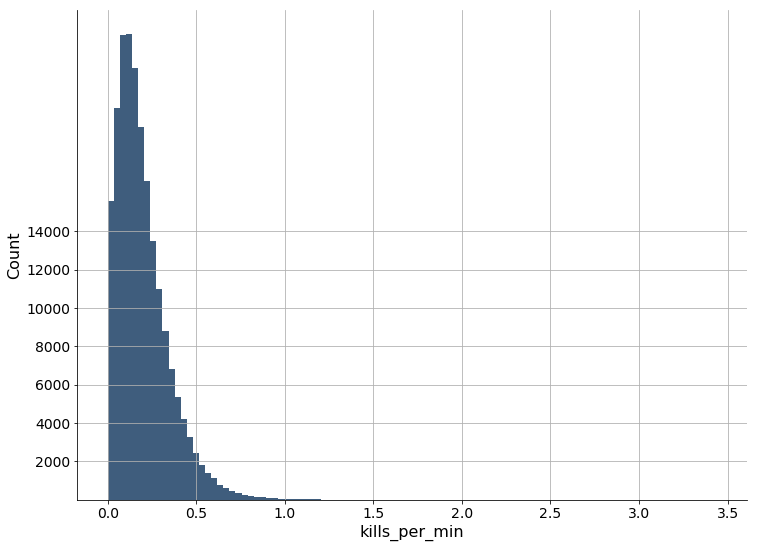

In [14]:
plt.figure(figsize=(12, 9)) 
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(range(2000, 15000, 2000), fontsize=14) 
plt.xlabel("kills_per_min", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
train2['kills_per_min'].hist(color="#3F5D7D", bins=100)
#plt.savefig("Gold per min", bbox_inches="tight")

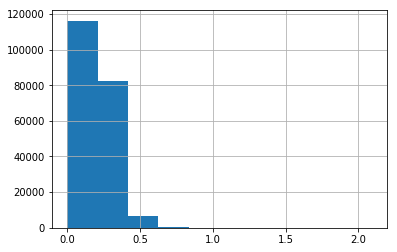

In [18]:
train2['deaths_per_min'].hist()

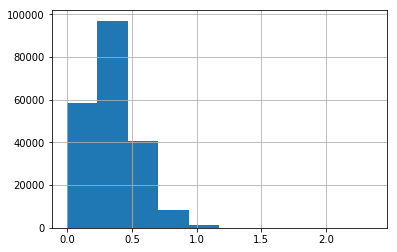

In [19]:
train2['assists_per_min'].hist()

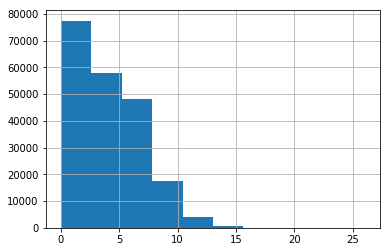

In [20]:
train2['last_hits_per_min'].hist()

In [22]:
# Create a veriable whether player win or not
train2['w'] = train2['radiant_win'] + train2['team']
train2 = train2.replace({'w': 2}, 10)
train2 = train2.replace({'w': -1}, 10)
train2 = train2.replace({'w': 1}, -10)
train2 = train2.replace({'w': 0}, -10)
train2 = train2.replace({'w': 10}, 1)
train2 = train2.replace({'w': -10}, 0)
train2.head()

,matchId,radiant_win,duration,hero_id,account_id,player_slot,kills,deaths,assists,gold_per_min,last_hits,xp_per_min,team,kills_per_min,deaths_per_min,assists_per_min,last_hits_per_min,w
0,4244579889,-1,2211,35,91751637,0,3,10,11,393,155,417,1,0.081411,0.271370,0.298507,4.206242,0
1,4235878221,1,2408,25,171758899,0,16,9,13,575,198,649,1,0.398671,0.224252,0.323920,4.933555,1
2,4235835817,1,2786,11,89117038,0,14,11,14,601,310,716,1,0.301508,0.236899,0.301508,6.676238,1
3,4235786355,1,3235,11,4294967295,0,14,9,12,681,471,727,1,0.259660,0.166924,0.222566,8.735703,1
4,4235738179,1,2698,62,85536171,0,5,8,21,411,43,500,1,0.111193,0.177910,0.467013,0.956264,1


In [28]:
#Group by account_id and calculate mean for values
train_features = train2.groupby('account_id')['kills','deaths','assists', 'gold_per_min', 'last_hits', 'xp_per_min', 'kills_per_min', 'deaths_per_min', 'assists_per_min', 'last_hits_per_min'].aggregate('mean')
train_features['w'] = train2.groupby('account_id')['w'].aggregate('sum')
train_features['num_games'] = train2.groupby('account_id')['account_id'].aggregate('count')
train_features['win_rate'] = train_features['w'] / train_features['num_games']
train_features.head()

,kills,deaths,assists,gold_per_min,last_hits,xp_per_min,kills_per_min,deaths_per_min,assists_per_min,last_hits_per_min,w,num_games,win_rate
account_id,,,,,,,,,,,,,
15158,7.0,8.0,30.0,389.000000,164.000000,644.000000,0.122485,0.139983,0.524934,2.869641,0,1,0.000000
20642,8.0,6.0,9.0,1010.000000,78.000000,1463.000000,0.459770,0.344828,0.517241,4.482759,0,1,0.000000
26952,2.0,5.0,22.5,325.000000,96.000000,488.000000,0.049192,0.122980,0.520117,2.386819,1,2,0.500000
28787,7.0,14.0,18.0,333.000000,66.000000,393.000000,0.167397,0.334795,0.430450,1.578318,0,1,0.000000
30208,4.0,7.0,10.0,320.428571,70.857143,389.285714,0.132170,0.237172,0.315927,2.318371,2,7,0.285714


In [33]:
# Calculate a player score based on other features
train_features['player_score'] = (train_features['kills_per_min'] + train_features['assists_per_min']) / train_features['deaths_per_min']
train_features.head()

,kills,deaths,assists,gold_per_min,last_hits,xp_per_min,kills_per_min,deaths_per_min,assists_per_min,last_hits_per_min,w,num_games,win_rate,player_score
account_id,,,,,,,,,,,,,,
15158,7.0,8.0,30.0,389.000000,164.000000,644.000000,0.122485,0.139983,0.524934,2.869641,0,1,0.000000,4.625000
20642,8.0,6.0,9.0,1010.000000,78.000000,1463.000000,0.459770,0.344828,0.517241,4.482759,0,1,0.000000,2.833333
26952,2.0,5.0,22.5,325.000000,96.000000,488.000000,0.049192,0.122980,0.520117,2.386819,1,2,0.500000,4.629294
28787,7.0,14.0,18.0,333.000000,66.000000,393.000000,0.167397,0.334795,0.430450,1.578318,0,1,0.000000,1.785714
30208,4.0,7.0,10.0,320.428571,70.857143,389.285714,0.132170,0.237172,0.315927,2.318371,2,7,0.285714,1.889334


In [34]:
# Select the data only with match and players ID
train3_1 = train[['matchId', 'radiant_win', 'account_id_1', 'account_id_2', 'account_id_3', 'account_id_4', 'account_id_5', 'account_id_6', 'account_id_7', 'account_id_8', 'account_id_9', 'account_id_10']]
train3_1.head()

,matchId,radiant_win,account_id_1,account_id_2,account_id_3,account_id_4,account_id_5,account_id_6,account_id_7,account_id_8,account_id_9,account_id_10
0,4244610789,-1,84379306,91751637,89117038,89209404,4294967295,54742520,55449748,41909889,4294967295,86724687
1,4244579889,-1,91751637,127723837,84379306,89209404,89117038,120920002,4294967295,121994758,181569885,82933694
2,4235878221,1,171758899,178406320,196875694,340824093,215942127,89117038,91371513,4294967295,84379306,4294967295
3,4235835817,1,89117038,91371513,4294967295,84379306,168659298,131551602,237376914,163136974,179240485,241174430
4,4235786355,1,4294967295,4294967295,56418606,98639370,86185976,114396149,4294967295,89117038,91371513,4294967295


In [35]:
# Select relevant variables
train_featuresJoint = train_features[['gold_per_min', 'xp_per_min', 'kills_per_min', 'deaths_per_min', 'assists_per_min', 
                                      'last_hits_per_min','player_score']]
train_featuresJoint.head()

,gold_per_min,xp_per_min,kills_per_min,deaths_per_min,assists_per_min,last_hits_per_min,player_score
account_id,,,,,,,
15158,389.000000,644.000000,0.122485,0.139983,0.524934,2.869641,4.625000
20642,1010.000000,1463.000000,0.459770,0.344828,0.517241,4.482759,2.833333
26952,325.000000,488.000000,0.049192,0.122980,0.520117,2.386819,4.629294
28787,333.000000,393.000000,0.167397,0.334795,0.430450,1.578318,1.785714
30208,320.428571,389.285714,0.132170,0.237172,0.315927,2.318371,1.889334


We want to analyze if the final features that we create are correlated just to ensure that we have a good Dataset. We can see in the following correlation matrix that there is not any high correlation between the features.

In [36]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [37]:
train_featuresJoint.corr()

,gold_per_min,xp_per_min,kills_per_min,deaths_per_min,assists_per_min,last_hits_per_min,player_score
gold_per_min,1.000000,0.865768,0.651041,-0.428465,0.068542,0.723014,0.420414
xp_per_min,0.865768,1.000000,0.542564,-0.320562,0.182855,0.494528,0.349421
kills_per_min,0.651041,0.542564,1.000000,-0.327152,0.086713,0.432621,0.483581
deaths_per_min,-0.428465,-0.320562,-0.327152,1.000000,-0.148557,-0.416925,-0.599702
assists_per_min,0.068542,0.182855,0.086713,-0.148557,1.000000,-0.252195,0.377199
last_hits_per_min,0.723014,0.494528,0.432621,-0.416925,-0.252195,1.000000,0.261513
player_score,0.420414,0.349421,0.483581,-0.599702,0.377199,0.261513,1.000000


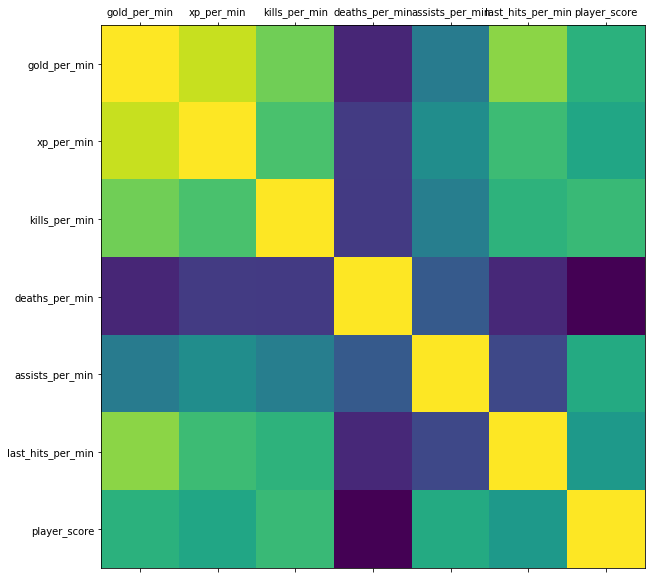

In [38]:
plot_corr(train_featuresJoint)

In [39]:
train2.head()

,matchId,radiant_win,duration,hero_id,account_id,player_slot,kills,deaths,assists,gold_per_min,last_hits,xp_per_min,team,kills_per_min,deaths_per_min,assists_per_min,last_hits_per_min,w
0,4244579889,-1,2211,35,91751637,0,3,10,11,393,155,417,1,0.081411,0.271370,0.298507,4.206242,0
1,4235878221,1,2408,25,171758899,0,16,9,13,575,198,649,1,0.398671,0.224252,0.323920,4.933555,1
2,4235835817,1,2786,11,89117038,0,14,11,14,601,310,716,1,0.301508,0.236899,0.301508,6.676238,1
3,4235786355,1,3235,11,4294967295,0,14,9,12,681,471,727,1,0.259660,0.166924,0.222566,8.735703,1
4,4235738179,1,2698,62,85536171,0,5,8,21,411,43,500,1,0.111193,0.177910,0.467013,0.956264,1


# Variance Reduction with Ordering

In [40]:
# Merge the two data set (games with features)
train3_1 = train[['matchId', 'radiant_win', 'account_id_1', 'account_id_2', 'account_id_3', 'account_id_4', 'account_id_5', 'account_id_6', 'account_id_7', 'account_id_8', 'account_id_9', 'account_id_10']]
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_1', right_on='account_id', how = 'left', suffixes=('', '_P1'), copy='True')
train3_1 = train3_1.reset_index()
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_2', right_on='account_id', how = 'left', suffixes=('', '_P2'), copy='True')
train3_1 = train3_1.reset_index()
train3_1 = train3_1.drop(columns = 'level_0')
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_3', right_on='account_id', how = 'left', suffixes=('', '_P3'), copy='True')
train3_1 = train3_1.reset_index()
train3_1 = train3_1.drop(columns = 'level_0')
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_4', right_on='account_id', how = 'left', suffixes=('', '_P4'), copy='True')
train3_1 = train3_1.reset_index()
train3_1 = train3_1.drop(columns = 'level_0')
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_5', right_on='account_id', how = 'left', suffixes=('', '_P5'), copy='True')
train3_1 = train3_1.reset_index()
train3_1 = train3_1.drop(columns = 'level_0')
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_6', right_on='account_id', how = 'left', suffixes=('', '_P6'), copy='True')
train3_1 = train3_1.reset_index()
train3_1 = train3_1.drop(columns = 'level_0')
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_7', right_on='account_id', how = 'left', suffixes=('', '_P7'), copy='True')
train3_1 = train3_1.reset_index()
train3_1 = train3_1.drop(columns = 'level_0')
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_8', right_on='account_id', how = 'left', suffixes=('', '_P8'), copy='True')
train3_1 = train3_1.reset_index()
train3_1 = train3_1.drop(columns = 'level_0')
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_9', right_on='account_id', how = 'left', suffixes=('', '_P9'), copy='True')
train3_1 = train3_1.reset_index()
train3_1 = train3_1.drop(columns = 'level_0')
train3_1 = train3_1.merge(train_featuresJoint, left_on='account_id_10', right_on='account_id', how = 'left', suffixes=('', '_P10'), copy='True')

In [41]:
train3_1['Rplayer1'] = '0'
train3_1['Rplayer1'] = train3_1['Rplayer1'].astype(np.int64)
train3_1['Rplayer2'] = '0'
train3_1['Rplayer2'] = train3_1['Rplayer2'].astype(np.int64)
train3_1['Rplayer3'] = '0'
train3_1['Rplayer3'] = train3_1['Rplayer3'].astype(np.int64)
train3_1['Rplayer4'] = '0'
train3_1['Rplayer4'] = train3_1['Rplayer4'].astype(np.int64)
train3_1['Rplayer5'] = '0'
train3_1['Rplayer5'] = train3_1['Rplayer5'].astype(np.int64)
train3_1['Dplayer1'] = '0'
train3_1['Dplayer1'] = train3_1['Dplayer1'].astype(np.int64)
train3_1['Dplayer2'] = '0'
train3_1['Dplayer2'] = train3_1['Dplayer2'].astype(np.int64)
train3_1['Dplayer3'] = '0'
train3_1['Dplayer3'] = train3_1['Dplayer3'].astype(np.int64)
train3_1['Dplayer4'] = '0'
train3_1['Dplayer4'] = train3_1['Dplayer4'].astype(np.int64)
train3_1['Dplayer5'] = '0'
train3_1['Dplayer5'] = train3_1['Dplayer5'].astype(np.int64)

In [42]:
columnofscores = {'Rscores': [], 'Dscores': []}

In [43]:
# Create a list of scores for a player in a team for the Radiant team
for i in range(train3_1.shape[0]):
    a = [train3_1['player_score'][i], train3_1['player_score_P2'][i], train3_1['player_score_P3'][i], train3_1['player_score_P4'][i], train3_1['player_score_P5'][i]]
    np.asarray(a)
    b = np.argsort(a)
    columnofscores['Rscores'].append(b)

In [44]:
# Create a list of scores for a player in a team for the Dire team
for i in range(train3_1.shape[0]):
    a = [train3_1['player_score_P6'][i], train3_1['player_score_P7'][i], train3_1['player_score_P8'][i], train3_1['player_score_P9'][i], train3_1['player_score_P10'][i]]
    np.asarray(a)
    b = np.argsort(a)
    columnofscores['Dscores'].append(b)

In [45]:
# Print thr ordering
print(columnofscores['Rscores'][0])
print(columnofscores['Dscores'][0])
print(columnofscores['Rscores'][1])
print(columnofscores['Dscores'][1])

[3 1 0 4 2]
[3 0 1 2 4]
[3 1 0 2 4]
[2 1 0 4 3]


In [46]:
lenght = train3_1.shape[0] 

In [47]:
# For each tean and game create the list of ranges(positions) to reorder them
for i in range(lenght):
    a = int(3 + columnofscores['Rscores'][i][4])
    train3_1.loc[i,'Rplayer1'] = np.int64(train3_1[train3_1.columns[a]][i])

In [48]:
train3_1.loc[0,'Rplayer1']

89117038

In [49]:
for i in range(lenght):
    a = int(3 + columnofscores['Rscores'][i][3])
    train3_1.loc[i,'Rplayer2'] = np.int64(train3_1[train3_1.columns[a]][i])

In [50]:
for i in range(lenght):
    a = int(3 + columnofscores['Rscores'][i][2])
    train3_1.loc[i,'Rplayer3'] = np.int64(train3_1[train3_1.columns[a]][i])

In [51]:
for i in range(lenght):
    a = int(3 + columnofscores['Rscores'][i][1])
    train3_1.loc[i,'Rplayer4'] = np.int64(train3_1[train3_1.columns[a]][i])

In [52]:
for i in range(lenght):
    a = int(3 + columnofscores['Rscores'][i][0])
    train3_1.loc[i,'Rplayer5'] = np.int64(train3_1[train3_1.columns[a]][i])

In [53]:
for i in range(lenght):
    a = int(8 + columnofscores['Dscores'][i][4])
    train3_1.loc[i,'Dplayer1'] = np.int64(train3_1[train3_1.columns[a]][i])

In [54]:
for i in range(lenght):
    a = int(8 + columnofscores['Dscores'][i][3])
    train3_1.loc[i,'Dplayer2'] = np.int64(train3_1[train3_1.columns[a]][i])

In [55]:
for i in range(lenght):
    a = int(8 + columnofscores['Dscores'][i][2])
    train3_1.loc[i,'Dplayer3'] = np.int64(train3_1[train3_1.columns[a]][i])

In [56]:
for i in range(lenght):
    a = int(8 + columnofscores['Dscores'][i][1])
    train3_1.loc[i,'Dplayer4'] = np.int64(train3_1[train3_1.columns[a]][i])

In [57]:
for i in range(lenght):
    a = int(8 + columnofscores['Dscores'][i][0])
    train3_1.loc[i,'Dplayer5'] = np.int64(train3_1[train3_1.columns[a]][i])

In [58]:
# Create columns to put the score of the players
train3_2 = train3_1[['matchId', 'radiant_win', 'Rplayer1', 'Rplayer2', 'Rplayer3', 'Rplayer4', 'Rplayer5', 'Dplayer1', 'Dplayer2', 'Dplayer3', 'Dplayer4', 'Dplayer5']]
train3_2.head()

,matchId,radiant_win,Rplayer1,Rplayer2,Rplayer3,Rplayer4,Rplayer5,Dplayer1,Dplayer2,Dplayer3,Dplayer4,Dplayer5
0,4244610789,-1,89117038,4294967295,84379306,91751637,89209404,86724687,41909889,55449748,54742520,4294967295
1,4244579889,-1,89117038,84379306,91751637,127723837,89209404,181569885,82933694,120920002,4294967295,121994758
2,4235878221,1,215942127,171758899,340824093,196875694,178406320,89117038,4294967295,4294967295,91371513,84379306
3,4235835817,1,89117038,4294967295,168659298,91371513,84379306,163136974,237376914,179240485,241174430,131551602
4,4235786355,1,4294967295,4294967295,98639370,86185976,56418606,89117038,114396149,4294967295,4294967295,91371513


In [59]:
train3_2 = train3_1[['matchId', 'radiant_win', 'Rplayer1', 'Rplayer2', 'Rplayer3', 'Rplayer4', 'Rplayer5', 'Dplayer1', 'Dplayer2', 'Dplayer3', 'Dplayer4', 'Dplayer5']]
train3_2 = train3_2.merge(train_featuresJoint, left_on='Rplayer1', right_on='account_id', how = 'left', suffixes=('', '_P1'), copy='True')
train3_2 = train3_2.reset_index()
train3_2 = train3_2.merge(train_featuresJoint, left_on='Rplayer2', right_on='account_id', how = 'left', suffixes=('', '_P2'), copy='True')
train3_2 = train3_2.reset_index()
train3_2 = train3_2.drop(columns = 'level_0')
train3_2 = train3_2.merge(train_featuresJoint, left_on='Rplayer3', right_on='account_id', how = 'left', suffixes=('', '_P3'), copy='True')
train3_2 = train3_2.reset_index()
train3_2 = train3_2.drop(columns = 'level_0')
train3_2 = train3_2.merge(train_featuresJoint, left_on='Rplayer4', right_on='account_id', how = 'left', suffixes=('', '_P4'), copy='True')
train3_2 = train3_2.reset_index()
train3_2 = train3_2.drop(columns = 'level_0')
train3_2 = train3_2.merge(train_featuresJoint, left_on='Rplayer5', right_on='account_id', how = 'left', suffixes=('', '_P5'), copy='True')
train3_2 = train3_2.reset_index()
train3_2 = train3_2.drop(columns = 'level_0')
train3_2 = train3_2.merge(train_featuresJoint, left_on='Dplayer1', right_on='account_id', how = 'left', suffixes=('', '_P6'), copy='True')
train3_2 = train3_2.reset_index()
train3_2 = train3_2.drop(columns = 'level_0')
train3_2 = train3_2.merge(train_featuresJoint, left_on='Dplayer2', right_on='account_id', how = 'left', suffixes=('', '_P7'), copy='True')
train3_2 = train3_2.reset_index()
train3_2 = train3_2.drop(columns = 'level_0')
train3_2 = train3_2.merge(train_featuresJoint, left_on='Dplayer3', right_on='account_id', how = 'left', suffixes=('', '_P8'), copy='True')
train3_2 = train3_2.reset_index()
train3_2 = train3_2.drop(columns = 'level_0')
train3_2 = train3_2.merge(train_featuresJoint, left_on='Dplayer4', right_on='account_id', how = 'left', suffixes=('', '_P9'), copy='True')
train3_2 = train3_2.reset_index()
train3_2 = train3_2.drop(columns = 'level_0')
train3_2 = train3_2.merge(train_featuresJoint, left_on='Dplayer5', right_on='account_id', how = 'left', suffixes=('', '_P10'), copy='True')

In [60]:
train3_2.head()

,index,matchId,radiant_win,Rplayer1,Rplayer2,Rplayer3,Rplayer4,Rplayer5,Dplayer1,Dplayer2,...,assists_per_min_P9,last_hits_per_min_P9,player_score_P9,gold_per_min_P10,xp_per_min_P10,kills_per_min_P10,deaths_per_min_P10,assists_per_min_P10,last_hits_per_min_P10,player_score_P10
0,0,4244610789,-1,89117038,4294967295,84379306,91751637,89209404,86724687,41909889,...,NaN,NaN,NaN,442.80319,517.659243,0.195666,0.204316,0.349368,4.147247,2.667598
1,1,4244579889,-1,89117038,84379306,91751637,127723837,89209404,181569885,82933694,...,0.349368,4.147247,2.667598,584.00000,688.000000,0.244233,0.271370,0.271370,8.602442,1.900000
2,2,4235878221,1,215942127,171758899,340824093,196875694,178406320,89117038,4294967295,...,0.372157,4.760569,1.975731,362.25000,522.500000,0.193060,0.366792,0.396130,1.001641,1.606332
3,3,4235835817,1,89117038,4294967295,168659298,91371513,84379306,163136974,237376914,...,0.475150,2.077127,2.569428,482.00000,577.000000,0.238270,0.240945,0.353016,4.809093,2.454026
4,4,4235786355,1,4294967295,4294967295,98639370,86185976,56418606,89117038,114396149,...,0.349368,4.147247,2.667598,428.25000,542.750000,0.081978,0.229857,0.372157,4.760569,1.975731


In [61]:
test2 = test[['matchId', 'radiant_win', 'account_id_1', 'account_id_2', 'account_id_3', 'account_id_4', 'account_id_5', 'account_id_6', 'account_id_7', 'account_id_8', 'account_id_9', 'account_id_10']]
test2 = test2.merge(train_featuresJoint, left_on='account_id_1', right_on='account_id', how = 'left', suffixes=('', '_P1'), copy='True')
test2 = test2.reset_index()
test2 = test2.merge(train_featuresJoint, left_on='account_id_2', right_on='account_id', how = 'left', suffixes=('', '_P2'), copy='True')
test2 = test2.reset_index()
test2 = test2.drop(columns = 'level_0')
test2 = test2.merge(train_featuresJoint, left_on='account_id_3', right_on='account_id', how = 'left', suffixes=('', '_P3'), copy='True')
test2 = test2.reset_index()
test2 = test2.drop(columns = 'level_0')
test2 = test2.merge(train_featuresJoint, left_on='account_id_4', right_on='account_id', how = 'left', suffixes=('', '_P4'), copy='True')
test2 = test2.reset_index()
test2 = test2.drop(columns = 'level_0')
test2 = test2.merge(train_featuresJoint, left_on='account_id_5', right_on='account_id', how = 'left', suffixes=('', '_P5'), copy='True')
test2 = test2.reset_index()
test2 = test2.drop(columns = 'level_0')
test2 = test2.merge(train_featuresJoint, left_on='account_id_6', right_on='account_id', how = 'left', suffixes=('', '_P6'), copy='True')
test2 = test2.reset_index()
test2 = test2.drop(columns = 'level_0')
test2 = test2.merge(train_featuresJoint, left_on='account_id_7', right_on='account_id', how = 'left', suffixes=('', '_P7'), copy='True')
test2 = test2.reset_index()
test2 = test2.drop(columns = 'level_0')
test2 = test2.merge(train_featuresJoint, left_on='account_id_8', right_on='account_id', how = 'left', suffixes=('', '_P8'), copy='True')
test2 = test2.reset_index()
test2 = test2.drop(columns = 'level_0')
test2 = test2.merge(train_featuresJoint, left_on='account_id_9', right_on='account_id', how = 'left', suffixes=('', '_P9'), copy='True')
test2 = test2.reset_index()
test2 = test2.drop(columns = 'level_0')
test2 = test2.merge(train_featuresJoint, left_on='account_id_10', right_on='account_id', how = 'left', suffixes=('', '_P10'), copy='True')

In [63]:
train_features_Final = train_featuresJoint.reset_index()
unknown_guy = train_features_Final.iloc[29274]
unknown_guy
unknown_guy.shape

(8,)

In [65]:
#train_featuresJoint.tail()
train_features_Final.iloc[29274]

account_id           4.294967e+09
gold_per_min         4.428032e+02
xp_per_min           5.176592e+02
kills_per_min        1.956661e-01
deaths_per_min       2.043165e-01
assists_per_min      3.493680e-01
last_hits_per_min    4.147247e+00
player_score         2.667598e+00
Name: 29274, dtype: float64

In [66]:
values = {'gold_per_min': unknown_guy[1], 'xp_per_min': unknown_guy[2], 'kills_per_min': unknown_guy[3], 'deaths_per_min': unknown_guy[4], 'assists_per_min': unknown_guy[5], 'last_hits_per_min': unknown_guy[6], 'player_score': unknown_guy[7]
,'gold_per_min_P2': unknown_guy[1], 'xp_per_min_P2': unknown_guy[2], 'kills_per_min_P2': unknown_guy[3], 'deaths_per_min_P2': unknown_guy[4], 'assists_per_min_P2': unknown_guy[5], 'last_hits_per_min_P2': unknown_guy[6], 'player_score_P2': unknown_guy[7]
,'gold_per_min_P3': unknown_guy[1], 'xp_per_min_P3': unknown_guy[2], 'kills_per_min_P3': unknown_guy[3], 'deaths_per_min_P3': unknown_guy[4], 'assists_per_min_P3': unknown_guy[5], 'last_hits_per_min_P3': unknown_guy[6], 'player_score_P3': unknown_guy[7]
,'gold_per_min_P4': unknown_guy[1], 'xp_per_min_P4': unknown_guy[2], 'kills_per_min_P4': unknown_guy[3], 'deaths_per_min_P4': unknown_guy[4], 'assists_per_min_P4': unknown_guy[5], 'last_hits_per_min_P4': unknown_guy[6], 'player_score_P4': unknown_guy[7]
,'gold_per_min_P5': unknown_guy[1], 'xp_per_min_P5': unknown_guy[2], 'kills_per_min_P5': unknown_guy[3], 'deaths_per_min_P5': unknown_guy[4], 'assists_per_min_P5': unknown_guy[5], 'last_hits_per_min_P5': unknown_guy[6], 'player_score_P5': unknown_guy[7]
,'gold_per_min_P6': unknown_guy[1], 'xp_per_min_P6': unknown_guy[2], 'kills_per_min_P6': unknown_guy[3], 'deaths_per_min_P6': unknown_guy[4], 'assists_per_min_P6': unknown_guy[5], 'last_hits_per_min_P6': unknown_guy[6], 'player_score_P6': unknown_guy[7]
,'gold_per_min_P7': unknown_guy[1], 'xp_per_min_P7': unknown_guy[2], 'kills_per_min_P7': unknown_guy[3], 'deaths_per_min_P7': unknown_guy[4], 'assists_per_min_P7': unknown_guy[5], 'last_hits_per_min_P7': unknown_guy[6], 'player_score_P7': unknown_guy[7]
,'gold_per_min_P8': unknown_guy[1], 'xp_per_min_P8': unknown_guy[2], 'kills_per_min_P8': unknown_guy[3], 'deaths_per_min_P8': unknown_guy[4], 'assists_per_min_P8': unknown_guy[5], 'last_hits_per_min_P8': unknown_guy[6], 'player_score_P8': unknown_guy[7]
,'gold_per_min_P9': unknown_guy[1], 'xp_per_min_P9': unknown_guy[2], 'kills_per_min_P9': unknown_guy[3], 'deaths_per_min_P9': unknown_guy[4], 'assists_per_min_P9': unknown_guy[5], 'last_hits_per_min_P9': unknown_guy[6], 'player_score_P9': unknown_guy[7]
,'gold_per_min_P10': unknown_guy[1], 'xp_per_min_P10': unknown_guy[2], 'kills_per_min_P10': unknown_guy[3], 'deaths_per_min_P10': unknown_guy[4], 'assists_per_min_P10': unknown_guy[5], 'last_hits_per_min_P10': unknown_guy[6], 'player_score_P10': unknown_guy[7]}
test_fin = test2.fillna(value=values)

In [67]:
test_fin['Rplayer1'] = '0'
test_fin['Rplayer1'] = test_fin['Rplayer1'].astype(np.int64)
test_fin['Rplayer2'] = '0'
test_fin['Rplayer2'] = test_fin['Rplayer2'].astype(np.int64)
test_fin['Rplayer3'] = '0'
test_fin['Rplayer3'] = test_fin['Rplayer3'].astype(np.int64)
test_fin['Rplayer4'] = '0'
test_fin['Rplayer4'] = test_fin['Rplayer4'].astype(np.int64)
test_fin['Rplayer5'] = '0'
test_fin['Rplayer5'] = test_fin['Rplayer5'].astype(np.int64)
test_fin['Dplayer1'] = '0'
test_fin['Dplayer1'] = test_fin['Dplayer1'].astype(np.int64)
test_fin['Dplayer2'] = '0'
test_fin['Dplayer2'] = test_fin['Dplayer2'].astype(np.int64)
test_fin['Dplayer3'] = '0'
test_fin['Dplayer3'] = test_fin['Dplayer3'].astype(np.int64)
test_fin['Dplayer4'] = '0'
test_fin['Dplayer4'] = test_fin['Dplayer4'].astype(np.int64)
test_fin['Dplayer5'] = '0'
test_fin['Dplayer5'] = test_fin['Dplayer5'].astype(np.int64)

In [68]:
columnofscores_test = {'Rscores': [], 'Dscores': []}

In [69]:
for i in range(test_fin.shape[0]):
    a = [test_fin['player_score'][i], test_fin['player_score_P2'][i], test_fin['player_score_P3'][i], test_fin['player_score_P4'][i], test_fin['player_score_P5'][i]]
    np.asarray(a)
    b = np.argsort(a)
    columnofscores_test['Rscores'].append(b)

In [70]:
for i in range(test_fin.shape[0]):
    a = [test_fin['player_score_P6'][i], test_fin['player_score_P7'][i], test_fin['player_score_P8'][i], test_fin['player_score_P9'][i], test_fin['player_score_P10'][i]]
    np.asarray(a)
    b = np.argsort(a)
    columnofscores_test['Dscores'].append(b)

In [71]:
lenght_test = test_fin.shape[0] 

In [72]:
for i in range(lenght_test):
    a = int(3 + columnofscores_test['Rscores'][i][4])
    test_fin.loc[i,'Rplayer1'] = np.int64(test_fin[test_fin.columns[a]][i])

In [73]:
for i in range(lenght_test):
    a = int(3 + columnofscores_test['Rscores'][i][4])
    test_fin.loc[i,'Rplayer1'] = np.int64(test_fin[test_fin.columns[a]][i])

In [74]:
for i in range(lenght_test):
    a = int(3 + columnofscores_test['Rscores'][i][3])
    test_fin.loc[i,'Rplayer2'] = np.int64(test_fin[test_fin.columns[a]][i])

In [75]:
for i in range(lenght_test):
    a = int(3 + columnofscores_test['Rscores'][i][2])
    test_fin.loc[i,'Rplayer3'] = np.int64(test_fin[test_fin.columns[a]][i])

In [76]:
for i in range(lenght_test):
    a = int(3 + columnofscores_test['Rscores'][i][1])
    test_fin.loc[i,'Rplayer4'] = np.int64(test_fin[test_fin.columns[a]][i])

In [77]:
for i in range(lenght_test):
    a = int(3 + columnofscores_test['Rscores'][i][0])
    test_fin.loc[i,'Rplayer5'] = np.int64(test_fin[test_fin.columns[a]][i])

In [78]:
for i in range(lenght_test):
    a = int(8 + columnofscores_test['Dscores'][i][4])
    test_fin.loc[i,'Dplayer1'] = np.int64(test_fin[test_fin.columns[a]][i])

In [79]:
for i in range(lenght_test):
    a = int(8 + columnofscores_test['Dscores'][i][3])
    test_fin.loc[i,'Dplayer2'] = np.int64(test_fin[test_fin.columns[a]][i])

In [80]:
for i in range(lenght_test):
    a = int(8 + columnofscores_test['Dscores'][i][2])
    test_fin.loc[i,'Dplayer3'] = np.int64(test_fin[test_fin.columns[a]][i])

In [81]:
for i in range(lenght_test):
    a = int(8 + columnofscores_test['Dscores'][i][1])
    test_fin.loc[i,'Dplayer4'] = np.int64(test_fin[test_fin.columns[a]][i])

In [82]:
for i in range(lenght_test):
    a = int(8 + columnofscores_test['Dscores'][i][0])
    test_fin.loc[i,'Dplayer5'] = np.int64(test_fin[test_fin.columns[a]][i])

In [83]:
test_fin2 = test_fin[['matchId', 'radiant_win', 'Rplayer1', 'Rplayer2', 'Rplayer3', 'Rplayer4', 'Rplayer5', 'Dplayer1', 'Dplayer2', 'Dplayer3', 'Dplayer4', 'Dplayer5']]
test_fin2.head()

,matchId,radiant_win,Rplayer1,Rplayer2,Rplayer3,Rplayer4,Rplayer5,Dplayer1,Dplayer2,Dplayer3,Dplayer4,Dplayer5
0,4176218481,1,284301350,4294967295,4294967295,4294967295,4294967295,142237436,230691847,164324465,4294967295,4294967295
1,4175786086,1,164324465,130686703,4294967295,4294967295,4294967295,133837079,4294967295,4294967295,118753646,457447646
2,4175721477,-1,164324465,4294967295,4294967295,4294967295,4294967295,4294967295,4294967295,4294967295,4294967295,4294967295
3,4175668662,1,164324465,4294967295,4294967295,4294967295,4294967295,4294967295,4294967295,189458876,342507232,4294967295
4,4174486906,-1,213952767,158393163,4294967295,256595304,857908232,106289601,164324465,125796910,382385120,170644194


In [84]:
test_fin2 = test_fin[['matchId', 'radiant_win', 'Rplayer1', 'Rplayer2', 'Rplayer3', 'Rplayer4', 'Rplayer5', 'Dplayer1', 'Dplayer2', 'Dplayer3', 'Dplayer4', 'Dplayer5']]
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Rplayer1', right_on='account_id', how = 'left', suffixes=('', '_P1'), copy='True')
test_fin2 = test_fin2.reset_index()
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Rplayer2', right_on='account_id', how = 'left', suffixes=('', '_P2'), copy='True')
test_fin2 = test_fin2.reset_index()
test_fin2 = test_fin2.drop(columns = 'level_0')
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Rplayer3', right_on='account_id', how = 'left', suffixes=('', '_P3'), copy='True')
test_fin2 = test_fin2.reset_index()
test_fin2 = test_fin2.drop(columns = 'level_0')
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Rplayer4', right_on='account_id', how = 'left', suffixes=('', '_P4'), copy='True')
test_fin2 = test_fin2.reset_index()
test_fin2 = test_fin2.drop(columns = 'level_0')
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Rplayer5', right_on='account_id', how = 'left', suffixes=('', '_P5'), copy='True')
test_fin2 = test_fin2.reset_index()
test_fin2 = test_fin2.drop(columns = 'level_0')
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Dplayer1', right_on='account_id', how = 'left', suffixes=('', '_P6'), copy='True')
test_fin2 = test_fin2.reset_index()
test_fin2 = test_fin2.drop(columns = 'level_0')
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Dplayer2', right_on='account_id', how = 'left', suffixes=('', '_P7'), copy='True')
test_fin2 = test_fin2.reset_index()
test_fin2 = test_fin2.drop(columns = 'level_0')
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Dplayer3', right_on='account_id', how = 'left', suffixes=('', '_P8'), copy='True')
test_fin2 = test_fin2.reset_index()
test_fin2 = test_fin2.drop(columns = 'level_0')
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Dplayer4', right_on='account_id', how = 'left', suffixes=('', '_P9'), copy='True')
test_fin2 = test_fin2.reset_index()
test_fin2 = test_fin2.drop(columns = 'level_0')
test_fin2 = test_fin2.merge(train_featuresJoint, left_on='Dplayer5', right_on='account_id', how = 'left', suffixes=('', '_P10'), copy='True')

In [85]:
test_fin2.isna().sum()

index                      0
matchId                    0
radiant_win                0
Rplayer1                   0
Rplayer2                   0
Rplayer3                   0
Rplayer4                   0
Rplayer5                   0
Dplayer1                   0
Dplayer2                   0
Dplayer3                   0
Dplayer4                   0
Dplayer5                   0
gold_per_min             483
xp_per_min               483
kills_per_min            483
deaths_per_min           483
assists_per_min          483
last_hits_per_min        483
player_score             483
gold_per_min_P2          725
xp_per_min_P2            725
kills_per_min_P2         725
deaths_per_min_P2        725
assists_per_min_P2       725
last_hits_per_min_P2     725
player_score_P2          725
gold_per_min_P3          802
xp_per_min_P3            802
kills_per_min_P3         802
                        ... 
last_hits_per_min_P6     467
player_score_P6          467
gold_per_min_P7          679
xp_per_min_P7 

In [86]:
test_fin3 = test_fin2.fillna(value=values)

In [87]:
test_fin3.isna().sum()

index                    0
matchId                  0
radiant_win              0
Rplayer1                 0
Rplayer2                 0
Rplayer3                 0
Rplayer4                 0
Rplayer5                 0
Dplayer1                 0
Dplayer2                 0
Dplayer3                 0
Dplayer4                 0
Dplayer5                 0
gold_per_min             0
xp_per_min               0
kills_per_min            0
deaths_per_min           0
assists_per_min          0
last_hits_per_min        0
player_score             0
gold_per_min_P2          0
xp_per_min_P2            0
kills_per_min_P2         0
deaths_per_min_P2        0
assists_per_min_P2       0
last_hits_per_min_P2     0
player_score_P2          0
gold_per_min_P3          0
xp_per_min_P3            0
kills_per_min_P3         0
                        ..
last_hits_per_min_P6     0
player_score_P6          0
gold_per_min_P7          0
xp_per_min_P7            0
kills_per_min_P7         0
deaths_per_min_P7        0
a

In [88]:
# Split the train set into x and y
train_fin = train3_2.dropna()
print(train3_2.shape)
print(train_fin.shape)
y_train = train_fin['radiant_win']
x_train = train_fin.drop(columns = ['index','matchId','radiant_win','Rplayer1', 'Rplayer2', 'Rplayer3','Rplayer4', 'Rplayer5', 'Dplayer1', 
                                    'Dplayer2', 'Dplayer3', 'Dplayer4','Dplayer5', 'player_score', 'player_score_P2', 
                                    'player_score_P3', 'player_score_P4', 'player_score_P5', 'player_score_P6', 'player_score_P7'
                                   , 'player_score_P8', 'player_score_P9', 'player_score_P10']) 
print(y_train.shape)
print(x_train.shape)

(22099, 83)
(22094, 83)
(22094,)
(22094, 60)


In [89]:
# Split the test set into x and y
y_test = test_fin3['radiant_win']
x_test = test_fin3.drop(columns = ['index','matchId', 'radiant_win', 'Rplayer1', 'Rplayer2', 'Rplayer3', 'Rplayer4', 'Rplayer5', 
                                   'Dplayer1', 'Dplayer2', 'Dplayer3', 'Dplayer4', 'Dplayer5','player_score', 'player_score_P2', 
                                    'player_score_P3', 'player_score_P4', 'player_score_P5', 'player_score_P6', 'player_score_P7'
                                   , 'player_score_P8', 'player_score_P9', 'player_score_P10'])
x_test.shape

(2456, 60)

# Model Training and Application

# Logistic Regression

In [90]:
# Apply Logistic regression
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
# Calculate accuracy for the training set
clf.score(x_train,y_train)

0.7199239612564498

In [92]:
# Make predictions
predictions = clf.predict(x_test)

In [93]:
# Calculate confusion matrix, accuracy and AUC
cm = metrics.confusion_matrix(y_test, predictions)
score = clf.score(x_test, y_test)
AUC = roc_auc_score(y_test, predictions)
print('The score is:',score)
print('The AUC is:', AUC)
print('Structure for the confusion matrix is ([TN,FN],[FP,TP])')
print(cm)

The score is: 0.5301302931596091
The AUC is: 0.517422083172262
Structure for the confusion matrix is ([TN,FN],[FP,TP])
[[409 718]
 [436 893]]


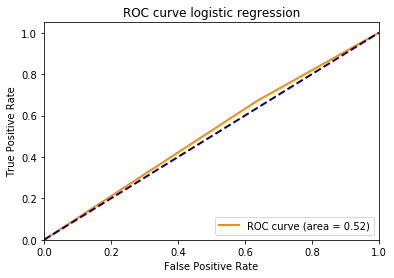

In [94]:
#We calculate the ROC_curve between the initial Y_Test data and the Predicted Y_Test_data (Pred_Y)
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve logistic regression')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machines - Gaussian Kernel

In [95]:
# Apply SVM with RBF Kernel
clf_svc_1 = SVC(cache_size = 1000)
clf_svc_1.fit(x_train,y_train)

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
# Calculate accuracy for the training set
clf_svc_1.score(x_train,y_train)

0.9992305603331221

In [97]:
# Make predictions
predictions_SVM = clf_svc_1.predict(x_test)

In [98]:
# Calculate confusion matrix, accuracy and AUC
cm1 = metrics.confusion_matrix(y_test, predictions_SVM)
score1 = clf_svc_1.score(x_test, y_test)
AUC1 = roc_auc_score(y_test, predictions_SVM)
print('The score is:',score1)
print('The AUC is:', AUC1)
print('Structure for the confusion matrix is ([TN,FN],[FP,TP])')
print(cm1)

The score is: 0.5850977198697068
The AUC is: 0.5479148181011535
Structure for the confusion matrix is ([TN,FN],[FP,TP])
[[ 108 1019]
 [   0 1329]]


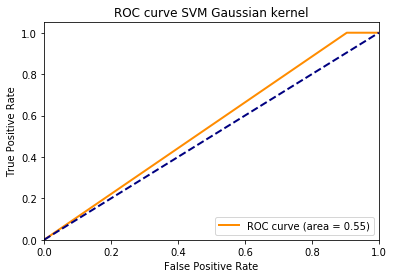

In [99]:
#We calculate the ROC_curve between the initial Y_Test data and the Predicted Y_Test_data (Pred_Y)
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_SVM)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve SVM Gaussian kernel')
plt.legend(loc="lower right")
plt.show()

# SVM Gaussian Kernel with Cross Validation

In [89]:
#Cross validation
cv_svc = StratifiedKFold(n_splits =10)
scores_svc = cross_val_score(clf_svc_1, x_train, y_train, cv=cv_svc)

In [93]:
accu_svc = scores_svc.mean() #Get the mean accuracy
print('Results of the Accuracy for Gaussian kernel SVM:', accu_svc)
print('Results Scores Cross Validation', scores_svc)

Results of the Accuracy for Gaussian kernel SVM: 0.5988526215538821
Results Scores Cross Validation [0.58687783 0.62624434 0.59366516 0.58552036 0.57647059 0.601177
 0.56948846 0.62426437 0.6016297  0.62318841]


# Support Vector Machines - Linear Kernel

In [94]:
#Now, based on that we have 60 features to fit our model, we will apply an SVM with a linear kernel.
#Apply SVM Linear Kernel
clf_svc_lin = SVC(kernel = 'linear', cache_size = 1000)

In [95]:
clf_svc_lin.fit(x_train,y_train)

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
# Calculate accuracy for the training set
clf_svc_lin.score(x_train,y_train)

0.7169819860595636

In [102]:
# Make predictions
predictions_SVM_lin = clf_svc_lin.predict(x_test)

In [109]:
# Calculate confusion matrix, accuracy and AUC in Test Set
# The structure for the confusion matrix is ([TN,FN],[FP,TP])
cm_lin = metrics.confusion_matrix(y_test, predictions_SVM_lin)
score_lin = clf_svc_lin.score(x_test, y_test)
AUC_lin = roc_auc_score(y_test, predictions_SVM_lin)
print('The score is:',score_lin)
print('The AUC is:', AUC_lin)
print('Structure for the confusion matrix is ([TN,FN],[FP,TP])')
print(cm_lin)

The score is: 0.5301302931596091
The AUC is: 0.5160734231861357
Structure for the confusion matrix is ([TN,FN],[FP,TP])
[[389 738]
 [416 913]]


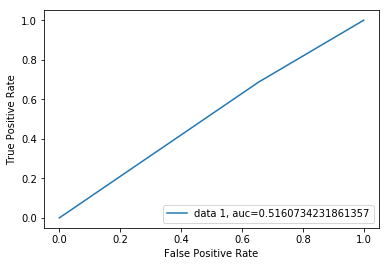

In [105]:
#We calculate the ROC_curve between the initial Y_Test data and the Predicted Y_Test_data (Pred_Y)
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_SVM_lin)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve SVM linear kernel')
plt.legend(loc="lower right")
plt.show()

As we can see, the best results we got was with SVM Gaussian Kernel with Cross Validation. Also, we got a better AUC_score with the Gaussian Kernel.